In [1]:
import pandas as pd

In [2]:
df2 = pd.read_csv("tatortmurot.csv", header=0, sep=";")
#df2.set_index(date)
#df2.sort_index(ascending=True)
df2.set_index('date', inplace=True)
#df2.index = df2.index.tz_localize('GMT').tz_convert('CET')
df2.index.name = 'Zeit'
#df2.index

#df3=df2

df3=df2[(df2.index > '2020-11-22 19:14:35')].drop_duplicates()
#df2= df2[(df2.index > '2020-11-08 19:15:06')]

In [3]:
#df3
df3.sort_values(by=['Zeit'],ascending=True)
#print(df3)

,text
Zeit,
2020-11-22 19:14:40,heute #doubleimpact oder #doubleteam mit #mur...
2020-11-22 19:14:42,ich habe jetzt eine verabredung mit monsieur m...
2020-11-22 19:14:44,@tatort @daserste ohne uns\nman sieht schon in...
2020-11-22 19:14:51,"wein, weib, #tatort - jetzt!"
2020-11-22 19:15:00,murot-time (zum insgesamt neunten mal). immer ...
...,...
2020-11-22 23:35:48,rt @tatort: wie hat euch der tatort heute gefa...
2020-11-22 23:36:29,"rt @tatort: der gesichtsausdruck, wenn du weiß..."
2020-11-22 23:42:08,"rt @afd_muenster: wenn #jana nicht -wie der ""#..."


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk import *

text = df3['text']

In [5]:
stop_eng = stopwords.words('english')
stop_ger = stopwords.words('german')
customstopwords = ['geht','kommt','monsieur','echt','eigenen','zwei','bitte','ferien','hätte','wäre','hund','frau','doppelgänger','tatort','mal','der','bin','doch', '_', 'heute', 'gerade', 'erst', 'macht', 'eigentlich', 'warum', 'gibt', 'gar', 'immer', 'schon', 'beim', 'ganz', 'dass', 'wer', 'mehr', 'gleich', 'wohl']

In [6]:
tokens = []
sentences = []
for txt in text:
    sentences.append(txt.lower())
    tokens.extend([t.lower() for t in txt.split()])

    
hashtags = [w for w in tokens if w.startswith('#')]
mentions = [w for w in tokens if w.startswith('@')]
links = [w for w in tokens if w.startswith('http') or w.startswith('www')]
filtered_tokens = [w for w in tokens if not w in stop_ger and not w in stop_eng
                   and not w in customstopwords 
                   and w.isalpha() 
                   and not len(w)<3 
                   and not w in hashtags 
                   and not w in links 
                   and not w in mentions]

In [18]:
freq_dist = nltk.FreqDist(filtered_tokens)
#list(freq_dist)[:30]

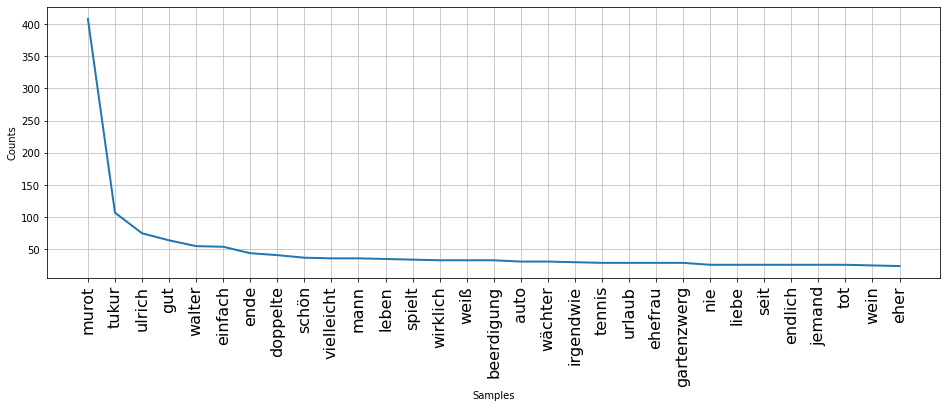

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.xticks(size=16)
freq_dist.plot(31)

In [20]:
tweettext = nltk.Text(filtered_tokens)
tweettext.collocations()

ulrich tukur; richtigen beerdigung; fertig dünn; thorsten merten;
beerdigung komme; griechischer wein; udo jürgens; top cars; bad
wildungen; letzte woche; jacques tati; felix murot; vielleicht morgen;
walter boenfeld; düst oldtimer; eilte pfau; oldtimer umher; alte dame;
doppelte lottchen; nick tschiller


In [21]:
names = nltk.corpus.names

In [22]:
namen = [n.lower() for n in names.words('male.txt') or names.words('female.txt')]

namen.append('murot')
namen.append('tukur')
namen.append('walter')
namen.append('lotta')
namen.append('boenfeld')
#namen.append('macos')






In [23]:
name_freq = nltk.FreqDist([w for w in filtered_tokens if w in namen])



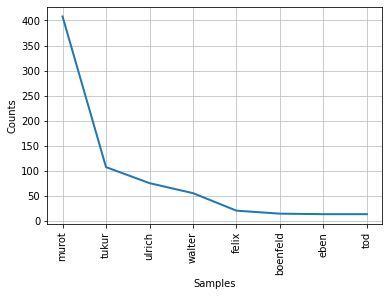

In [24]:
name_freq.plot(8)


In [25]:
#Senti with textblob

In [26]:
from textblob_de import TextBlobDE as TextBlob 
#from textblob import TextBlob 

def senti(sentence):
   
    blob=TextBlob(sentence)
    vs=blob.sentiment
    return vs

In [27]:
s =0;
ssum=0
slist = []
for i in range(len(df3.index)):
    sentence = df3['text'][i]
 #   print(sentence,senti(sentence))
    s = senti(sentence).polarity
    ssum = ssum +s
    slist.append(s)
df3['Sentiment'] = slist  
print(ssum) 

255.26839285714237


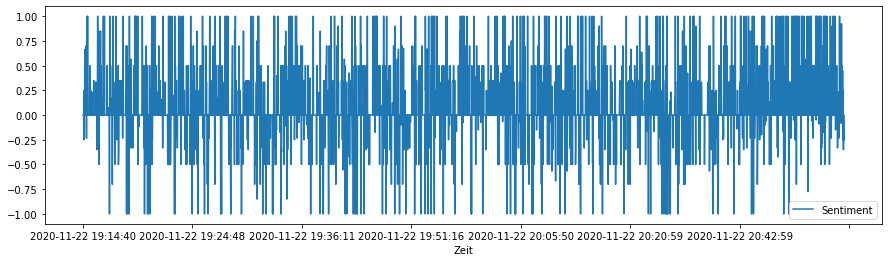

In [28]:
#df.index = pd.to_datetime(df["Date"])

from matplotlib import pyplot
import matplotlib.pylab as plb

df4 = df3.sort_index(ascending=True)

df4.plot( y=["Sentiment"],  figsize=(15,4))



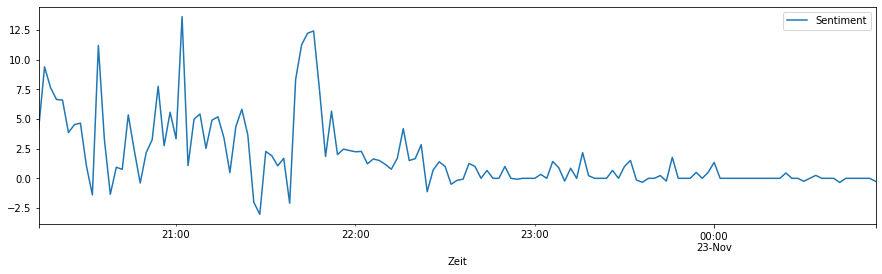

In [29]:
df4.index = pd.to_datetime(df4.index)+ pd.DateOffset(hours=+1)
df5=df4.resample('2T', level=0).sum()
df5.plot( y=["Sentiment"],  figsize=(15,4))

In [96]:

#df4.resample('2T', level=0).sum()
#df4.to_csv('tatortSentiment.csv')

In [162]:
df4

,text,Sentiment
Zeit,,
2020-11-22 20:14:40,heute #doubleimpact oder #doubleteam mit #mur...,0.00
2020-11-22 20:14:42,ich habe jetzt eine verabredung mit monsieur m...,0.00
2020-11-22 20:14:44,@tatort @daserste ohne uns\nman sieht schon in...,0.00
2020-11-22 20:14:51,"wein, weib, #tatort - jetzt!",0.00
2020-11-22 20:15:00,murot-time (zum insgesamt neunten mal). immer ...,-0.25
...,...,...
2020-11-23 00:35:48,rt @tatort: wie hat euch der tatort heute gefa...,0.25
2020-11-23 00:36:29,"rt @tatort: der gesichtsausdruck, wenn du weiß...",0.00
2020-11-23 00:42:08,"rt @afd_muenster: wenn #jana nicht -wie der ""#...",-0.35
